In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import tensorflow_probability.substrates.jax as tfp

2023-01-11 00:00:18.577851: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-11 00:00:18.631922: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-11 00:00:20.286121: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-11 00:00:20.286333: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-11 00:00:20.286354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Ca

In [2]:
from LaplaceApprox import LaplaceApproximation

/home/madhav/.local/lib/python3.8/site-packages/chex/_src/pytypes.py:37: FutureWarning: jax.tree_structure is deprecated, and will be removed in a future release. Use jax.tree_util.tree_structure instead.
  PyTreeDef = type(jax.tree_structure(None))


In [3]:
tfd = tfp.distributions
data_dist = tfd.Bernoulli(probs=0.7)
data = data_dist.sample(sample_shape=(100,), seed=jax.random.PRNGKey(3))
prior_theta = [3.0, 5.0]

In [4]:
def likelihood_fn(theta, data):
    return tfd.Bernoulli(probs=theta).log_prob(data).sum()

In [5]:
la = LaplaceApproximation(
    prior=tfd.Beta(prior_theta[0], prior_theta[1]),
    bijector=tfp.bijectors.Identity(),
    likelihood=likelihood_fn,
)

In [7]:
appx_post = la.approx_posterior(data)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 53.74it/s]


In [6]:
la.map(data)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:16<00:00, 12.21it/s]


DeviceArray([0.60377455], dtype=float32)

<Figure size 432x288 with 0 Axes>

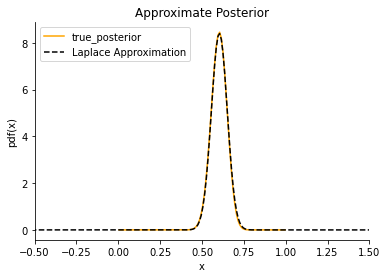

<Figure size 432x288 with 0 Axes>

In [11]:
alpha = prior_theta[0] + data.sum()
beta = prior_theta[1] + len(data) - data.sum()
true_posterior = tfd.Beta(alpha, beta)
fig = la.plot_approx_posterior(true_posterior=true_posterior)
plt.xlim(-0.5,1.5)
plt.figure()

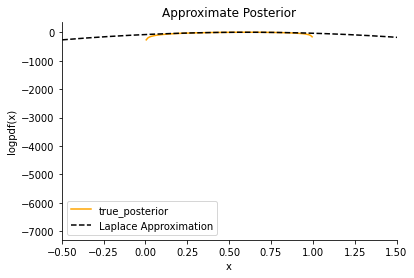

In [12]:
fig = la.plot_log_approx_posterior(true_posterior=true_posterior)
os.makedirs("plots", exist_ok=True)
plt.xlim(-0.5,1.5)
plt.savefig("plots/log_la_coin_toss.png")